### Running this notebook without GPU will be really slow.   
### If you have only CPU, make the networks smaller.

Some code originates from: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

#### You may need to install pydot for the figure. You can do it via running the code below in a cell:
!pip install pydot --user 

Load some functions from keras:

In [1]:
import os
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

%matplotlib inline

Using TensorFlow backend.


In [2]:
num_classes = 10

save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


Look at a few train images:

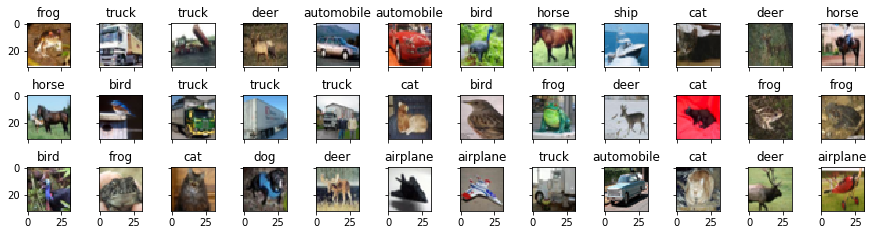

In [4]:
cifar10classes = {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 
                  6:'frog', 7:'horse', 8:'ship', 9:'truck'}
fig = plt.figure(1, (15., 4.))
grid = ImageGrid(fig, 111, nrows_ncols=(3, 12), axes_pad=0.4)

for i in range(36):
    grid[i].imshow(x_train[i])
    grid[i].set_title(cifar10classes[y_train[i][0]])

In [5]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test  = keras.utils.to_categorical(y_test, num_classes)

Scaling pixel values to 0-1 region.

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))


model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

## Examine the parameters!

1. layer $\to (f\cdot f\cdot n^{0}_c + 1)\cdot n^{1}_c = (3\cdot 3\cdot 3 + 1)\cdot 32 = 896$ 
2. layer $\to (f\cdot f\cdot n^{1}_c + 1)\cdot n^{2}_c = (3\cdot 3\cdot 32 + 1)\cdot 32 = 9248$   
...

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
activation_3 (Activation)    (None, 15, 15, 64)        0         
__________

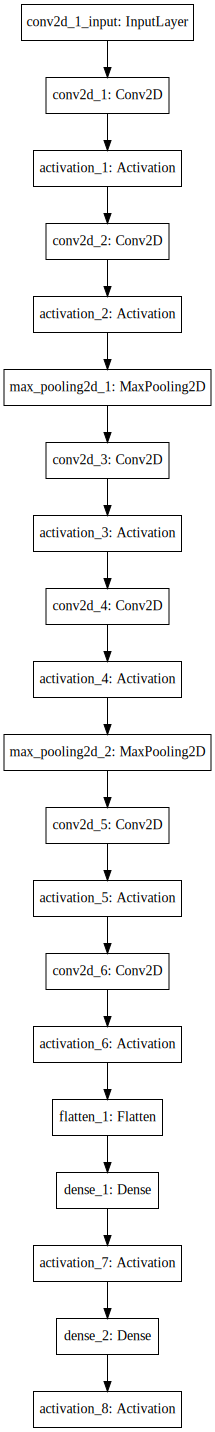

In [10]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [11]:
model.fit(x_train, y_train,
              batch_size=32,
              epochs=30,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 43s - loss: 1.7893 - acc: 0.3436 - val_loss: 1.5395 - val_acc: 0.4242
Epoch 2/30
50000/50000 [==============================] - 12s - loss: 1.4369 - acc: 0.4781 - val_loss: 1.4694 - val_acc: 0.4796
Epoch 3/30
50000/50000 [==============================] - 12s - loss: 1.2693 - acc: 0.5462 - val_loss: 1.2472 - val_acc: 0.5527
Epoch 4/30
50000/50000 [==============================] - 12s - loss: 1.1507 - acc: 0.5914 - val_loss: 1.1751 - val_acc: 0.5801
Epoch 5/30
50000/50000 [==============================] - 12s - loss: 1.0556 - acc: 0.6276 - val_loss: 1.0582 - val_acc: 0.6247
Epoch 6/30
50000/50000 [==============================] - 12s - loss: 0.9766 - acc: 0.6548 - val_loss: 1.0389 - val_acc: 0.6375
Epoch 7/30
50000/50000 [==============================] - 12s - loss: 0.9119 - acc: 0.6796 - val_loss: 0.9916 - val_acc: 0.6489
Epoch 8/30
50000/50000 [==============================

## Try a fully connected network too!

In [12]:
model = Sequential()
model.add(Dense(2048, activation='relu', input_dim=32*32*3))
model.add(Dense(2048, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 2048)              6293504   
_________________________________________________________________
dense_4 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dense_6 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 11,605,898
Trainable params: 11,605,898
Non-trainable params: 0
_________________________________________________________________


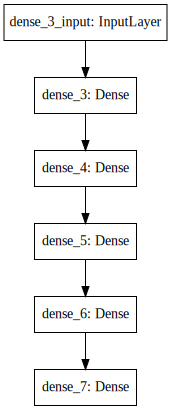

In [14]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [15]:
model.fit(x_train.reshape(50000,32*32*3), y_train,
              batch_size=32,
              epochs=30,
              validation_data=(x_test.reshape(10000,32*32*3), y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 25s - loss: 1.8842 - acc: 0.3147 - val_loss: 1.7690 - val_acc: 0.3547
Epoch 2/30
50000/50000 [==============================] - 26s - loss: 1.7035 - acc: 0.3870 - val_loss: 1.6788 - val_acc: 0.3888
Epoch 3/30
50000/50000 [==============================] - 26s - loss: 1.6279 - acc: 0.4131 - val_loss: 1.6046 - val_acc: 0.4306
Epoch 4/30
50000/50000 [==============================] - 26s - loss: 1.5705 - acc: 0.4334 - val_loss: 1.5805 - val_acc: 0.4372
Epoch 5/30
50000/50000 [==============================] - 25s - loss: 1.5257 - acc: 0.4515 - val_loss: 1.5774 - val_acc: 0.4341
Epoch 6/30
50000/50000 [==============================] - 25s - loss: 1.4859 - acc: 0.4644 - val_loss: 1.5242 - val_acc: 0.4637
Epoch 7/30
50000/50000 [==============================] - 25s - loss: 1.4554 - acc: 0.4769 - val_loss: 1.4948 - val_acc: 0.4691
Epoch 8/30
50000/50000 [==============================

## Comparison:


 type | validation accuracy | train accuracy | #parameters |
 - | - | - | - |
fully connected | 48% | 67% | 11.6M |
convolutional |   75% | 94% | 555K | 